# Exploratory Data Analysis (EDA)

This notebook demonstrates key elements of exploratory data anlysis (EDA) using Python. EDA is the non-standard and often ad hoc process of learning about a data set, identifying basic trends, and performing data cleaning and wrangling tasks.

We will use data from the [Yelp Dataset Challenge](https://github.com/vc1492a/Yelp-Challenge-Dataset) as well as [U.S. Census data](https://www.census.gov/data/tables/2016/demo/popest/total-cities-and-towns.html).

We will use common Python libraries such as Pandas, Matplotlib, and Numpy. Before getting started, make sure to install the requirements with:

```
pip install -r requirements.txt
```

Let's start by importing these packages:

In [155]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline 

## Getting started
Now, we can read in the Yelp data as a Pandas dataframe:

In [116]:
yelp = pd.read_csv('data/yelp.csv')

We can look at the basic features of the yelp data by asking for its `.info()`

In [117]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57795 entries, 0 to 57794
Data columns (total 10 columns):
business_id           57795 non-null object
city                  57794 non-null object
name                  57795 non-null object
review_count          57795 non-null int64
stars                 57795 non-null float64
state                 57795 non-null object
price_range           32757 non-null float64
number_of_checkins    57795 non-null int64
category              16080 non-null object
restaurant            57065 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 4.4+ MB


We can also take a look at the first 5 rows by calling `.head()` on the dataframe:

In [118]:
yelp.head()

,business_id,city,name,review_count,stars,state,price_range,number_of_checkins,category,restaurant
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,Mr Hoagie,4,4.5,PA,1.0,0,Fast Food,1.0
1,UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,Clancy's Pub,4,3.5,PA,1.0,0,Nightlife,0.0
2,3eu6MEFlq2Dg7bQh8QbdOg,Dravosburg,Joe Cislo's Auto,3,5.0,PA,NaN,0,NaN,0.0
3,cE27W9VPgO88Qxe4ol6y_g,Bethel Park,Cool Springs Golf Center,5,2.5,PA,NaN,9,NaN,0.0
4,HZdLhv6COCleJMo7nPl-RA,Pittsburgh,Verizon,5,2.5,PA,2.0,0,NaN,0.0


## Basic exploration
Let's start by determining how many restaurants are in the dataset. Since we know that the field `restaurant` is binary `(1=restaurant, 0=not restaurant)` we can simply sum that field:

In [119]:
yelp.restaurant.sum()

11366.0

### Slicing data: let's look only at restaurants

We can use a slicer on the dataframe to redefine the dataframe to only contain restaurants.

In [120]:
yelp = yelp[yelp['restaurant'] == 1]

We can also confirm that the new dataframe has the expected number of rows:

In [121]:
yelp.shape

(11366, 10)

### Aggregations: where are the restaurants located?

In [122]:
yelp.state.value_counts()

AZ    5015
NV    3208
NC    1319
PA     944
WI     619
IL     188
SC      73
Name: state, dtype: int64

Pandas gives us an easy way to plot our restaurant counts by state:

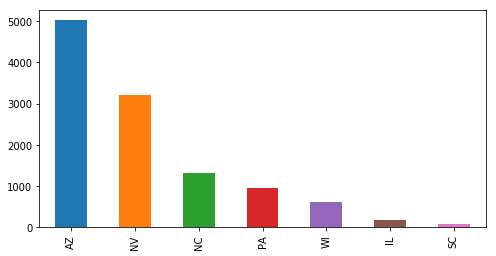

In [123]:
yelp.state.value_counts().plot(kind='bar', figsize=(8,4))

#### What categories of restaurants are there?
We can easily determine the types of restaurants in the dataset as well.

In [124]:
yelp.category.value_counts()

Mexican                   1645
Pizza                     1202
Chinese                    956
Sandwiches                 695
American (Traditional)     649
Fast Food                  599
American (New)             583
Italian                    468
Food                       426
Burgers                    339
Barbeque                   292
Thai                       260
Breakfast & Brunch         241
Seafood                    228
Japanese                   211
Vietnamese                 143
Indian                     135
Sushi Bars                 107
Mediterranean              104
Asian Fusion                92
Diners                      89
Greek                       75
Korean                      63
Vegetarian                  51
Middle Eastern              46
Nightlife                   28
Pizzza                       3
Pakistani                    3
Name: category, dtype: int64

### But wait...what is 'Pizzza'?!
Looks like we have some bad data. There are 3 restaurants categorized as `Pizzza`, but these should really be included in the `Pizza` category. Let's take care of that.

In [125]:
yelp.loc[yelp.category=='Pizzza', 'category'] = 'Pizza'

We can also plot these categories:

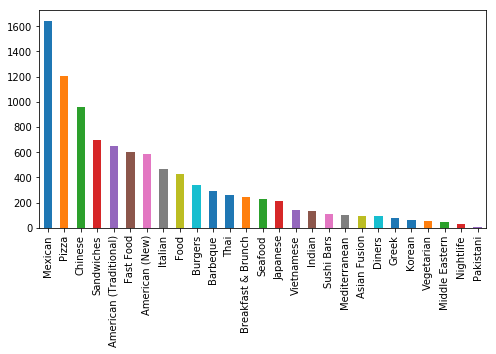

In [126]:
yelp.category.value_counts().plot(kind='bar', figsize=(8,4))

## Combine: let's add in population data
This will help us enrich our understanding of the Yelp data and contextualize some of the aggregations we've performed.

We can start by reading in the census data as a dataframe and taking a look at it:

In [127]:
pop = pd.read_csv('data/2016PopulationData.csv')
pop.head()

,GEO.id,GEO.id2,GEO.display-label,GC_RANK.target-geo-id,GC_RANK.target-geo-id2,GC_RANK.rank-label,GC_RANK.display-label,GC_RANK.display-label.1,rescensus42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,0100000US,NaN,United States,1620000US3651000,3651000,1,"United States - New York city, New York","New York city, New York",8175133.0,8174962,8192026,8284098,8361179,8422460,8471990,8516502,8537673
1,0100000US,NaN,United States,1620000US0644000,644000,2,"United States - Los Angeles city, California","Los Angeles city, California",3792621.0,3792584,3796292,3825393,3858137,3890436,3920173,3949149,3976322
2,0100000US,NaN,United States,1620000US1714000,1714000,3,"United States - Chicago city, Illinois","Chicago city, Illinois",2695598.0,2695620,2697736,2705404,2714120,2718887,2718530,2713596,2704958
3,0100000US,NaN,United States,1620000US4835000,4835000,4,"United States - Houston city, Texas","Houston city, Texas",2099451.0,2100277,2105625,2132157,2166458,2204406,2243999,2284816,2303482
4,0100000US,NaN,United States,1620000US0455000,455000,5,"United States - Phoenix city, Arizona","Phoenix city, Arizona",1445632.0,1447624,1450629,1469353,1499007,1525562,1554179,1582904,1615017


#### Uh Oh! Labels for city and state don't match
Of course, that would be too easy! We need to extract the city and state from each row from the census data in order to match it with the Yelp data. We also need to replace the Yelp state abbreviation's with their respective state names for our matching to work.

In [128]:
print(yelp.city.head())
print(pop['GC_RANK.display-label.1'].head())

0     Dravosburg
15      Carnegie
20      Carnegie
22      Carnegie
24    Pittsburgh
Name: city, dtype: object
0         New York city, New York
1    Los Angeles city, California
2          Chicago city, Illinois
3             Houston city, Texas
4           Phoenix city, Arizona
Name: GC_RANK.display-label.1, dtype: object


#### 1. Create 'city' and 'state' variable for the census data

In [129]:
pop['city'] = pop['GC_RANK.display-label.1'].apply(lambda x: ' '.join(x.split(',')[0].split()[:-1]).strip())
pop['state'] = pop['GC_RANK.display-label.1'].apply(lambda x: x.split(',')[1].strip())

While we're at it, let's rename the strange column name `respop72016` to something more intuitive. How about `population`? Works for me!

In [130]:
pop['population'] = pop['respop72016']

#### 2. Expand 'state' abbreviation in yelp data

In [131]:
yelp.state.unique()

array(['PA', 'NC', 'SC', 'WI', 'IL', 'AZ', 'NV'], dtype=object)

We can create a dictionary (yes, it's actually called this!) to translate State abbreviations to their full state names:

In [132]:
state_abbrev_dictionary = {'PA': 'Pennsylvania', 'NC': 'North Carolina', 'SC': 'South Carolina', 'WI': 'Wisconsin', 
               'IL': 'Illinois', 'AZ': 'Arizona', 'NV': 'Nevada'}

Now we can use this dictionary to replace the abbreviations with the full state names:

In [133]:
yelp.state.replace(state_abbrev_dictionary, inplace=True)
yelp.state.unique()

array(['Pennsylvania', 'North Carolina', 'South Carolina', 'Wisconsin',
       'Illinois', 'Arizona', 'Nevada'], dtype=object)

Now, let's merge the datasets, bringing population information into the Yelp dataframe

In [134]:
yelp = yelp.merge(pop[['city', 'state', 'population']], on=['city', 'state'], how='left')

In [135]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11366 entries, 0 to 11365
Data columns (total 11 columns):
business_id           11366 non-null object
city                  11366 non-null object
name                  11366 non-null object
review_count          11366 non-null int64
stars                 11366 non-null float64
state                 11366 non-null object
price_range           10780 non-null float64
number_of_checkins    11366 non-null int64
category              9733 non-null object
restaurant            11366 non-null float64
population            10288 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.0+ MB


### What did we just do?  **Entity resolution!**

## Descriptive statistics
What more can we learn about this dataset? Let's find out!

In [136]:
yelp.describe()

,review_count,stars,price_range,number_of_checkins,restaurant,population
count,11366.000000,11366.000000,10780.000000,11366.000000,11366.0,1.028800e+04
mean,62.447387,3.441448,1.538404,164.311103,1.0,6.365891e+05
std,163.232207,0.802070,0.637678,489.513931,0.0,4.801052e+05
min,3.000000,1.000000,1.000000,0.000000,1.0,5.453400e+04
25%,8.000000,3.000000,1.000000,10.000000,1.0,2.474770e+05
50%,21.000000,3.500000,1.000000,41.000000,1.0,6.329120e+05
75%,62.000000,4.000000,2.000000,142.000000,1.0,8.420510e+05
max,5642.000000,33.500000,4.000000,16641.000000,1.0,1.615017e+06


### 33.5 reviews huh? Sounds like bad data.
Let's find those restaurants and see what's going on:

In [137]:
yelp[yelp.stars > 5]

,business_id,city,name,review_count,stars,state,price_range,number_of_checkins,category,restaurant,population
105,XmdTkxKyJd7TuDLoiic1kg,Pittsburgh,Lidia's,277,33.5,Pennsylvania,3.0,261,Italian,1.0,303625.0


Looks like it is just one offending restaurant. 33.5 stars is probably a typo for 3.5 stars. Let's fix that!

In [138]:
yelp.loc[yelp.stars==33.5, 'stars'] = 3.5

### Let's do some further visual analysis of the data
Histograms are a great way to characterize datasets. Let's take a look:

In [139]:
yelp.drop('restaurant', inplace=True, axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cd74c50>,
      dtype=object)

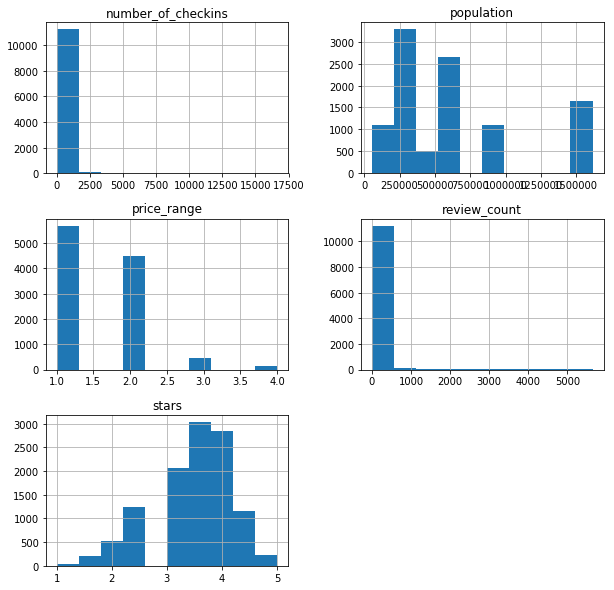

In [140]:
yelp.hist(figsize=(10,10))

### Normalizing our data
Taking the `log()` of data can help normalize a distribution (that does not contain zero). Similarly, we can take the square root of data to normalize distributions as well.

This will help us visually understand trends when there are major outliers in play. In this case, some cities have much, much higher populations than others. Similarly, the top restaurants are major outliers and have far more check ins than others.

In [141]:
yelp['population'] = np.log(yelp['population'])
yelp['number_of_checkins'] = np.sqrt(yelp['number_of_checkins'])
yelp['review_count'] = np.sqrt(yelp['review_count'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a6ddda0>,
      dtype=object)

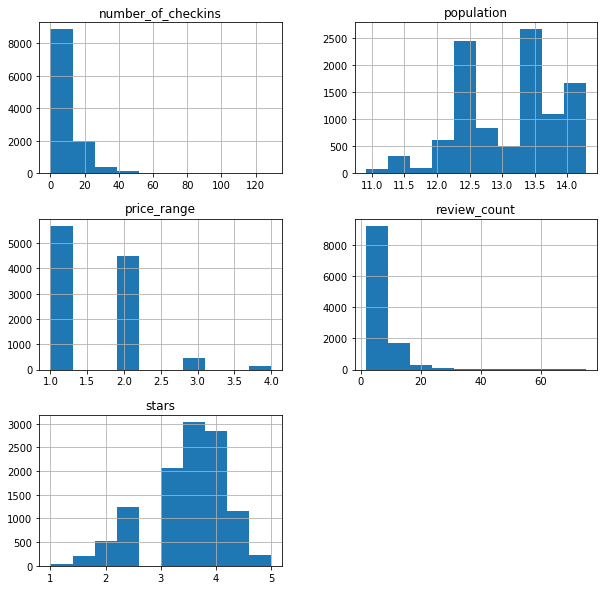

In [142]:
yelp.hist(figsize=(10,10))

We can also use box plots to show the distributions of our data's features. Box plots show the median, the inter-quartile range (between the first and third quartiles -- the box) and min/max. They also show us outliers. 

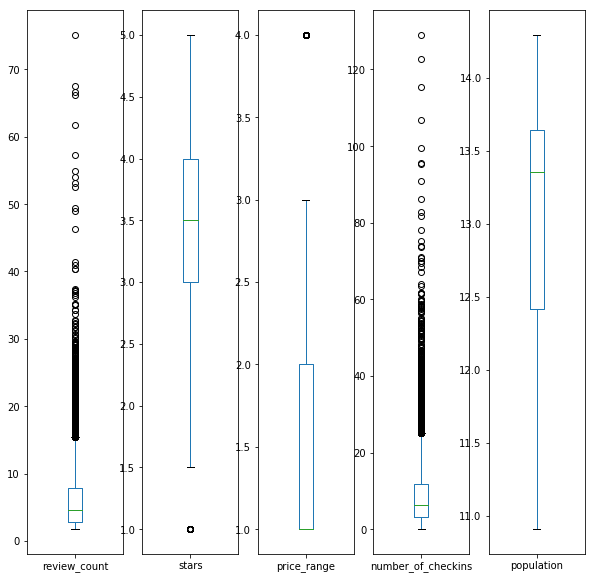

In [143]:
cols = list(yelp.select_dtypes(include=[np.number]).columns)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,10))
for i, ax in enumerate(axes.reshape(-1)):
    yelp[cols[i]].plot.box(ax=ax)

### Using correlation to identify trends
We can create a correlation matrix plot to demonstrate relationships between the various features.

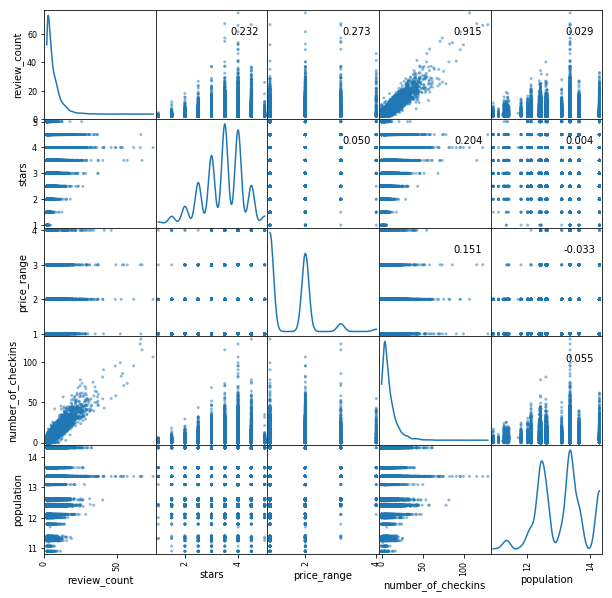

In [156]:
axes = scatter_matrix(yelp, alpha=0.5, diagonal='kde', figsize=(10,10))
corr = yelp.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

We can use this to _easily_ (ok it may look overwhelming at first, but you will eventually find these plots very useful) identify trends.

Note the strong positive correlation between `review_count` and `number_of_checkins`. Not too surprising. But what about the positive correlation between `review_count` and `stars`? Perhaps people are more likely to write good reviews than bad ones!

### Grouping data to enhance comparison
We can also use a grouping aggregation to compare stars per state. Interestingly, there doesn't seem to be much of a difference between average restaurants in the states in our sample. This also suggests that ratings normal distribution holds across state lines.

Arizona                AxesSubplot(0.1,0.679412;0.235294x0.220588)
Illinois          AxesSubplot(0.382353,0.679412;0.235294x0.220588)
Nevada            AxesSubplot(0.664706,0.679412;0.235294x0.220588)
North Carolina         AxesSubplot(0.1,0.414706;0.235294x0.220588)
Pennsylvania      AxesSubplot(0.382353,0.414706;0.235294x0.220588)
South Carolina    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
Wisconsin                  AxesSubplot(0.1,0.15;0.235294x0.220588)
dtype: object

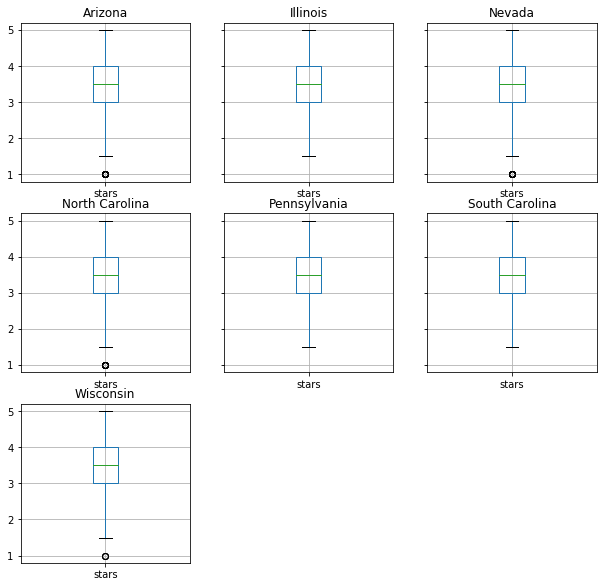

In [157]:
yelp.groupby('state').boxplot(column='stars', return_type='axes', figsize=(10,10))

We can further explore groupings by looking for top foods by state:

In [158]:
print('Top Foods')
for key, group in yelp[yelp.stars >=4].groupby('state'):
    top = list(group.category.value_counts().index)[:3]
    print('{}:'.format(key))
    print('1. {}, 2. {}, 3. {}\n'.format(top[0], top[1], top[2]))

Top Foods
Arizona:
1. Mexican, 2. Pizza, 3. Food

Illinois:
1. Mexican, 2. Pizza, 3. Chinese

Nevada:
1. Mexican, 2. Pizza, 3. Food

North Carolina:
1. Mexican, 2. Sandwiches, 3. American (Traditional)

Pennsylvania:
1. Pizza, 2. Food, 3. Sandwiches

South Carolina:
1. American (New), 2. Mexican, 3. Chinese

Wisconsin:
1. Food, 2. Pizza, 3. Mexican

